In [55]:
import zeep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
leg_serv = 'http://wslwebservices.leg.wa.gov/LegislationService.asmx?WSDL'
client = zeep.Client(wsdl=leg_serv)

In [5]:
bills_2017 = client.service.GetLegislationByYear('2017')
bills_2018 = client.service.GetLegislationByYear('2018')

In [18]:
#this cell is super slow. don't run it a lot
# Try using multiprocessing Queue
#NEED TO MAKE THIS A FUNCTION!
house_records_2017 = []
senate_records_2017 = []
i = 0
for bill in bills_2017: 
    bill_number = bill['BillNumber']
    roll_call = client.service.GetRollCalls('2017-18', bill_number)
    if roll_call is None:
        i += 1
    else:
        people_dict = {roll['Name']: roll['VOte'] for roll in roll_call[0]['Votes']['Vote']}    
        big_dict = {bill_number : people_dict}
        if roll_call[0]['Agency'] =='Senate':
            senate_records_2017.append(big_dict)
        elif roll_call[0]['Agency'] =='House':
            house_records_2017.append(big_dict)
        else:
            print(roll_call[0]['Agency'])
print(i)

2152


In [23]:
house_records_2018 = []
senate_records_2018 = []
i = 0
for bill in bills_2018: 
    bill_number = bill['BillNumber']
    roll_call = client.service.GetRollCalls('2017-18', bill_number)
    if roll_call is None:
        i += 1
    else:
        people_dict = {roll['Name']: roll['VOte'] for roll in roll_call[0]['Votes']['Vote']}    
        big_dict = {bill_number : people_dict}
        if roll_call[0]['Agency'] =='Senate':
            senate_records_2018.append(big_dict)
        elif roll_call[0]['Agency'] =='House':
            house_records_2018.append(big_dict)
        else:
            print(roll_call[0]['Agency'])
print(i)

3427


In [22]:
len(senate_records_2017)

1193

In [24]:
senate_billids = []
senate_rows = []
for rec in senate_records_2017: 
    iden, row = list(rec.items())[0]
    senate_billids.append(iden)
    senate_rows.append(row)
for rec in senate_records_2018: 
    iden, row = list(rec.items())[0]
    senate_billids.append(iden)
    senate_rows.append(row)

In [29]:
senate_bien_df = pd.DataFrame(senate_rows, index = senate_billids)
senate_bien_df.shape

(2085, 51)

In [30]:
senate_bien_bool_df = senate_2017_df.replace({'Yea':1.0, "Nay":0.0,"Excused":np.nan,"Absent":np.nan})

### Plotting number of Senate Yay and Nay votes from Biennium 2017-2018

In [31]:
yay_votes = senate_bien_bool_df[senate_bien_bool_df == 1].count()
nay_votes = senate_bien_bool_df[senate_bien_bool_df == 0].count()

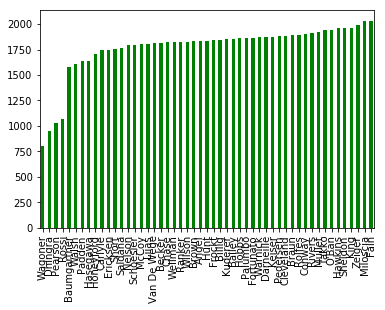

In [33]:
yay_votes.sort_values().plot.bar(color = 'g')

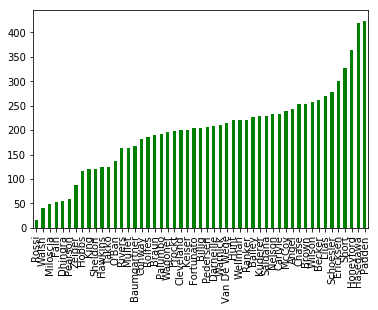

In [34]:
nay_votes.sort_values().plot.bar(color = 'g')

In [47]:
yay_votes_df = yay_votes.to_frame()
nay_votes_df = nay_votes.to_frame()

In [52]:
yay_votes_df = yay_votes_df.rename(columns={0:'Yay'})
nay_votes_df = nay_votes_df.rename(columns={0:'Nay'})

In [54]:
votes_df = yay_votes_df.join(nay_votes_df)
votes_df.head()

,Yay,Nay
Angel,1833,244
Bailey,1856,226
Baumgartner,1583,168
Becker,1816,262
Billig,1843,204


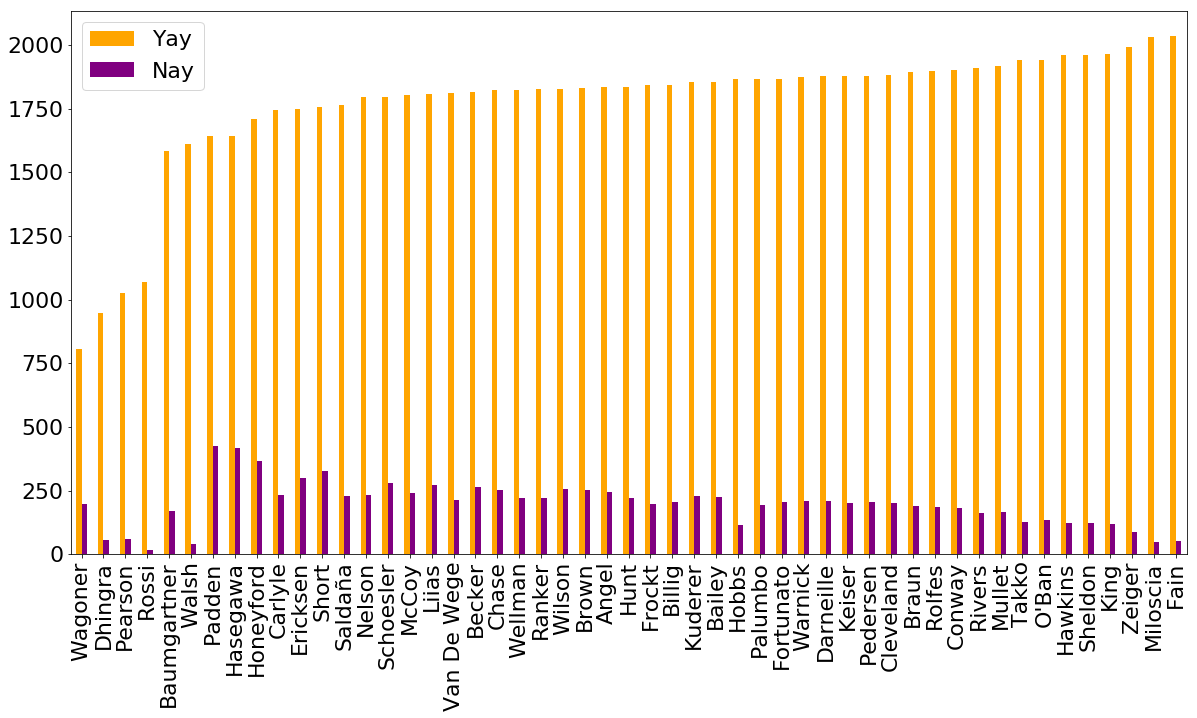

In [89]:
plt.rcParams.update({'font.size': 22})
votes_df.sort_values(by=['Yay']).plot.bar(color = ['orange','purple'], figsize=(20,10))
